In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import math
import missingno as msno
import itertools
import warnings
warnings.filterwarnings('ignore')

In [29]:
# prompt: read in dis_in.csv

df_merged_truncated = pd.read_csv("df_test_predictions.csv")


In [30]:
df_merged_truncated.head(1)

,Unnamed: 0,ROW_ID,processed_text,word_count,GENDER,ETHNICITY,MARITAL_STATUS,INSURANCE,LANGUAGE,AGE,environment_binary,community_binary,alcohol_binary
0,0,46006,"Lives at home with son, who is a teacher.Denie...",27,M,WHITE,LIFE PARTNER,Private,ENGL,66,1,1,1


In [41]:
sdoh_features = ['community_binary', 'environment_binary', 'alcohol_binary']
# age are droped

demographic_features = [ 'INSURANCE', 'LANGUAGE','MARITAL_STATUS', 'ETHNICITY','GENDER']

In [32]:
# prompt: for GENDER	ETHNICITY	MARITAL_STATUS	INSURANCE	LANGUAGE fill missing with mode

for col in ['GENDER', 'ETHNICITY', 'MARITAL_STATUS', 'INSURANCE', 'LANGUAGE']:
  df_merged_truncated[col] = df_merged_truncated[col].fillna(df_merged_truncated[col].mode()[0])


In [33]:
# prompt: value counts GENDER

df_merged_truncated['GENDER'].value_counts()


GENDER
M    20663
F    16104
Name: count, dtype: int64

In [34]:

# print(df_merged_truncated['ETHNICITY'].unique())

df_merged_truncated['ETHNICITY'] = df_merged_truncated['ETHNICITY'].apply(lambda x: 'WHITE' if x == 'WHITE' else 'Other')
df_merged_truncated['ETHNICITY'].value_counts()

ETHNICITY
WHITE    25398
Other    11369
Name: count, dtype: int64

In [35]:
marital_status_counts = df_merged_truncated['MARITAL_STATUS'].value_counts()

married_status = ['MARRIED','LIFE PARTNER' ]
non_married_status = ['SINGLE', 'UNKNOWN', 'WIDOWED', 'DIVORCED', 'SEPARATED']

df_merged_truncated['MARITAL_STATUS'] = df_merged_truncated['MARITAL_STATUS'].apply(lambda x: 'Married' if x in married_status else 'Non-Married')
df_merged_truncated['MARITAL_STATUS'].value_counts()

MARITAL_STATUS
Married        21914
Non-Married    14853
Name: count, dtype: int64

In [36]:
# INSURANCE
insurance_counts = df_merged_truncated['INSURANCE'].value_counts()
insurance_counts_private = insurance_counts['Private']
insurance_counts_others = sum(insurance_counts[insurance_counts.index != 'Private'])

df_merged_truncated['INSURANCE'] = df_merged_truncated['INSURANCE'].apply(lambda x: 'Private' if x == 'Private' else 'Other')
df_merged_truncated['INSURANCE'].value_counts()

INSURANCE
Other      22196
Private    14571
Name: count, dtype: int64

In [37]:
# language
insurance_counts = df_merged_truncated['LANGUAGE'].value_counts()
insurance_counts_private = insurance_counts['ENGL']
insurance_counts_others = sum(insurance_counts[insurance_counts.index != 'ENGL'])

df_merged_truncated['LANGUAGE'] = df_merged_truncated['LANGUAGE'].apply(lambda x: 'ENGL' if x == 'ENGL' else 'Other')
df_merged_truncated['LANGUAGE'].value_counts()

LANGUAGE
ENGL     33962
Other     2805
Name: count, dtype: int64

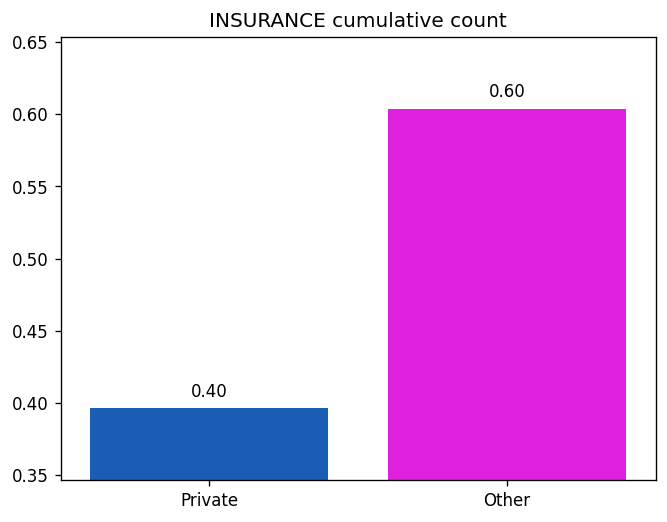

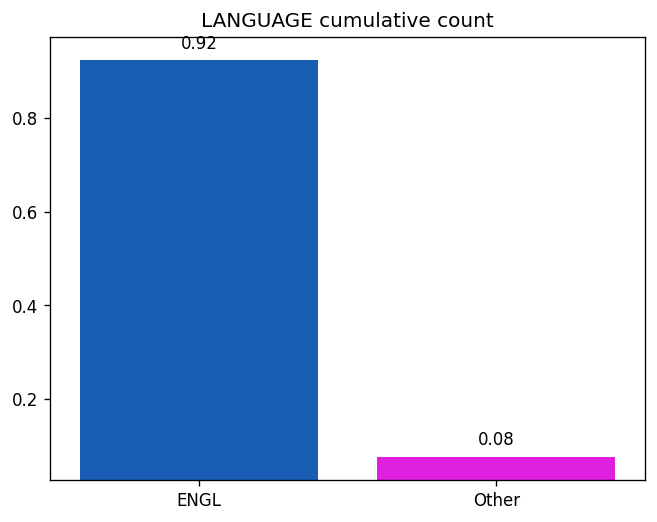

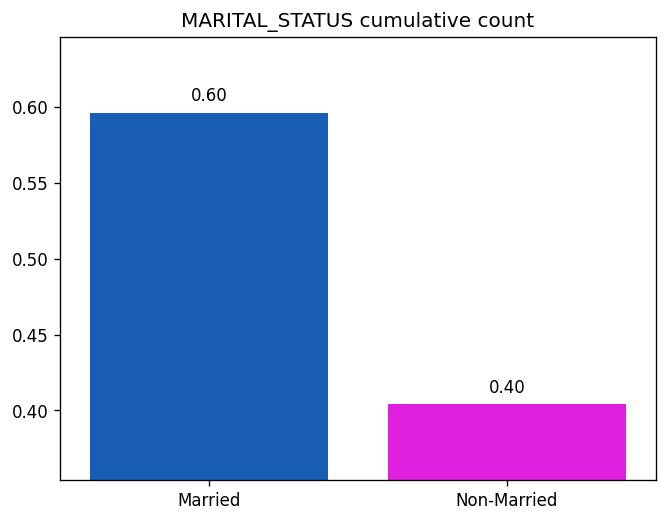

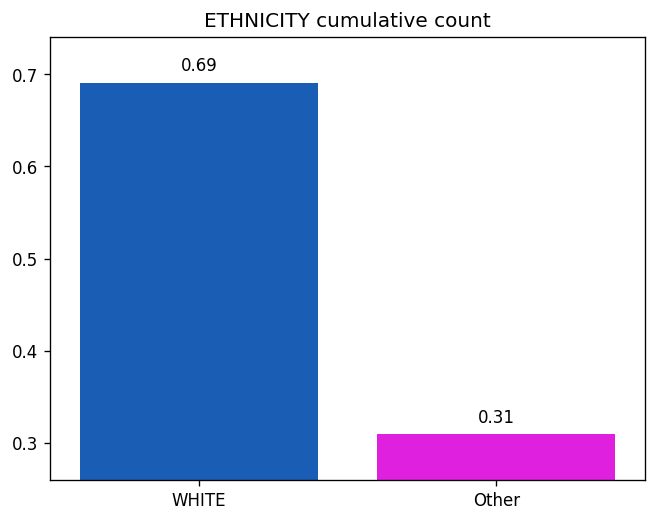

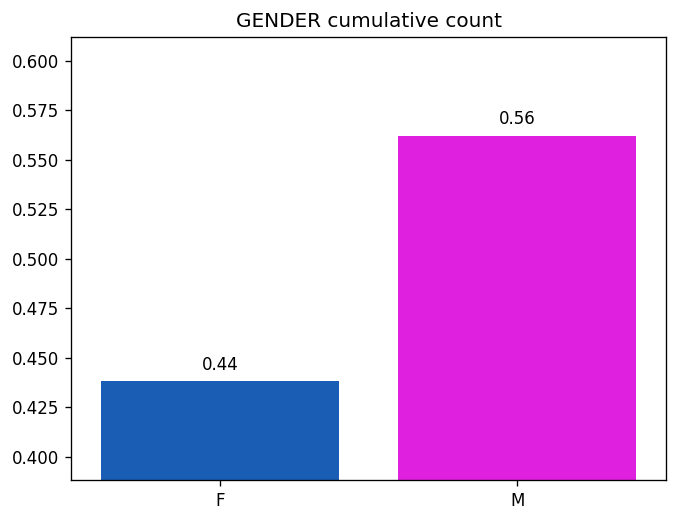

In [45]:
def demographic_count_analysis(df,demographic_features,normalize = False):
    # palette = ["#FF595E","#FFCA3A"]
    palette = ["#0059CF","#FF00FF"]

    if normalize == True:
        pass

    for demographic_feature in demographic_features:
        #countplot
        # plt.figure(figsize=(10,10))
        #do countplot without bars ordered lexicographically
        if demographic_feature == "INSURANCE":
            order = ["Private","Other"]
        elif demographic_feature == "LANGUAGE":
            order = ["ENGL","Other"]
        elif demographic_feature == 'MARITAL_STATUS':
            order = ["Married","Non-Married"]
        elif demographic_feature == "ETHNICITY":
            order = ["WHITE","Other"]
        # elif demographic_feature == "AGE":
        #     order = [">=65","<65"]
        elif demographic_feature == "GENDER":
            order = ["F","M"]




        if normalize:
            df_count = pd.DataFrame()
            for index,value in enumerate(order):
                #every countplot with respect to one sdho feature is put aside of last countplot so they don't overlap

                df_count[value] = [(df[demographic_feature] == value).sum()/df.shape[0]]

                    # df_count[sdoh_feature] = [df[indices][sdoh_feature].sum()]
                #countplot for df_count, the bottom of y starts with 0.45

            #plot bars of df_count values with respect to each column, write column name at bottom of each bar and set legend
            plt.figure(dpi=120)
            sns.barplot(data=df_count,palette = palette,order = order)
            #annotate value at top of each bar
            for p in plt.gca().patches:
                plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
            # plt.xticks()
            plt.title(f'{demographic_feature} cumulative count')

            plt.ylim(df_count.min().min()-0.05,df_count.max().max()+0.05)

            # plt.savefig(f'figures/normalized_{demographic_feature}_cumulative_count.jpg')


        else:
            sns.countplot(data=df,x=demographic_feature,order = order, palette = palette)
            plt.ylim(max(np.min(df[demographic_feature].value_counts().values)-1000,0),np.max(df[demographic_feature].value_counts().values)+1000)

            #annotate count on top of bars
            for p in plt.gca().patches:
                plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
            plt.title(f'{demographic_feature} cumulative count')


            #save figure
            # plt.savefig(f'figures/{demographic_feature}_cumulative_count.jpg')
        plt.show()

demographic_count_analysis(df_merged_truncated,demographic_features,normalize = True)

In [39]:
df_merged_truncated

,Unnamed: 0,ROW_ID,processed_text,word_count,GENDER,ETHNICITY,MARITAL_STATUS,INSURANCE,LANGUAGE,AGE,environment_binary,community_binary,alcohol_binary
0,0,46006,"Lives at home with son, who is a teacher.Denie...",27,M,WHITE,Married,Private,ENGL,66,1,1,1
1,1,39138,"Lives in , applying for a job and supposed to ...",20,M,WHITE,Married,Other,ENGL,85,1,0,1
2,2,37775,"- Lives alone in an apartment. - Widowed, son ...",64,F,WHITE,Married,Other,ENGL,38,1,1,1
3,3,46220,Lives at home and takes care of his sister. Di...,48,M,WHITE,Married,Private,ENGL,70,1,1,1
4,4,36043,retired building info systems no tobacco ETOH:...,20,M,Other,Married,Other,ENGL,145,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36762,36770,7575,The patient is married and lives on with his w...,30,F,WHITE,Non-Married,Other,ENGL,127,1,1,1
36763,36771,16970,The patient lives with her husband and daughte...,16,F,Other,Non-Married,Other,ENGL,77,1,1,1
36764,36772,36924,He is retired () from a clerical job with the ...,29,F,Other,Non-Married,Other,ENGL,380,0,0,1
36765,36773,493,"No tobacco, occasional alcohol, married",5,F,Other,Non-Married,Other,ENGL,-8,0,1,1


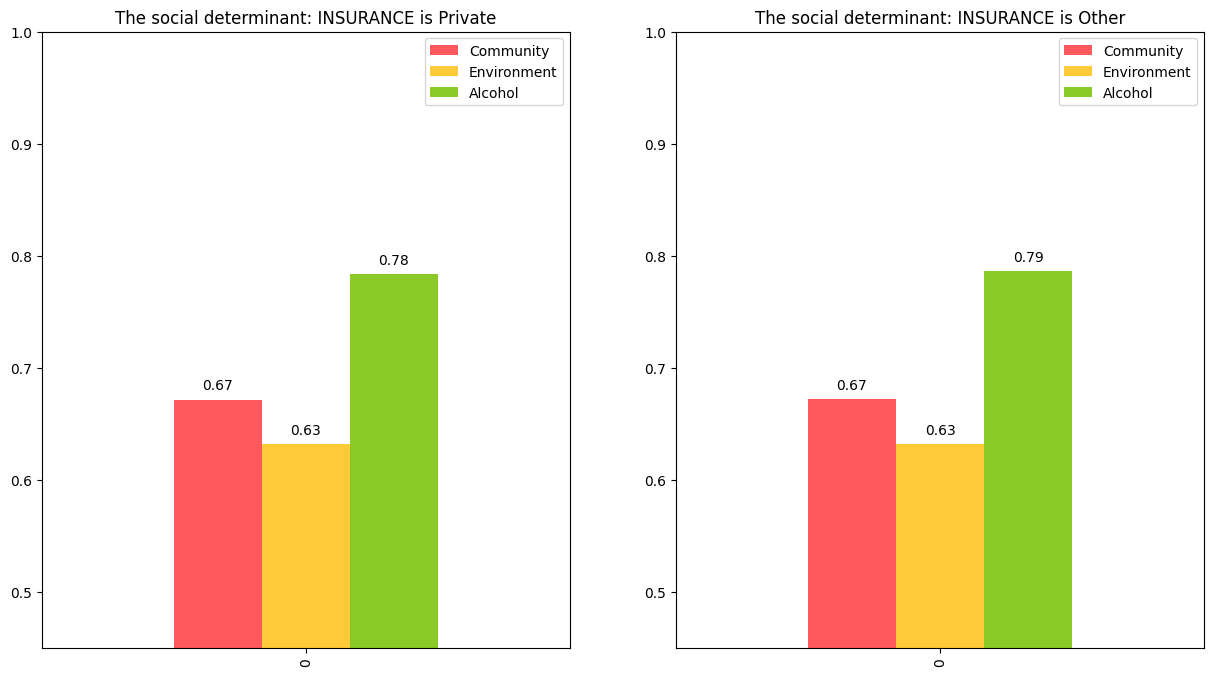

<Figure size 768x576 with 0 Axes>

<Figure size 768x576 with 0 Axes>

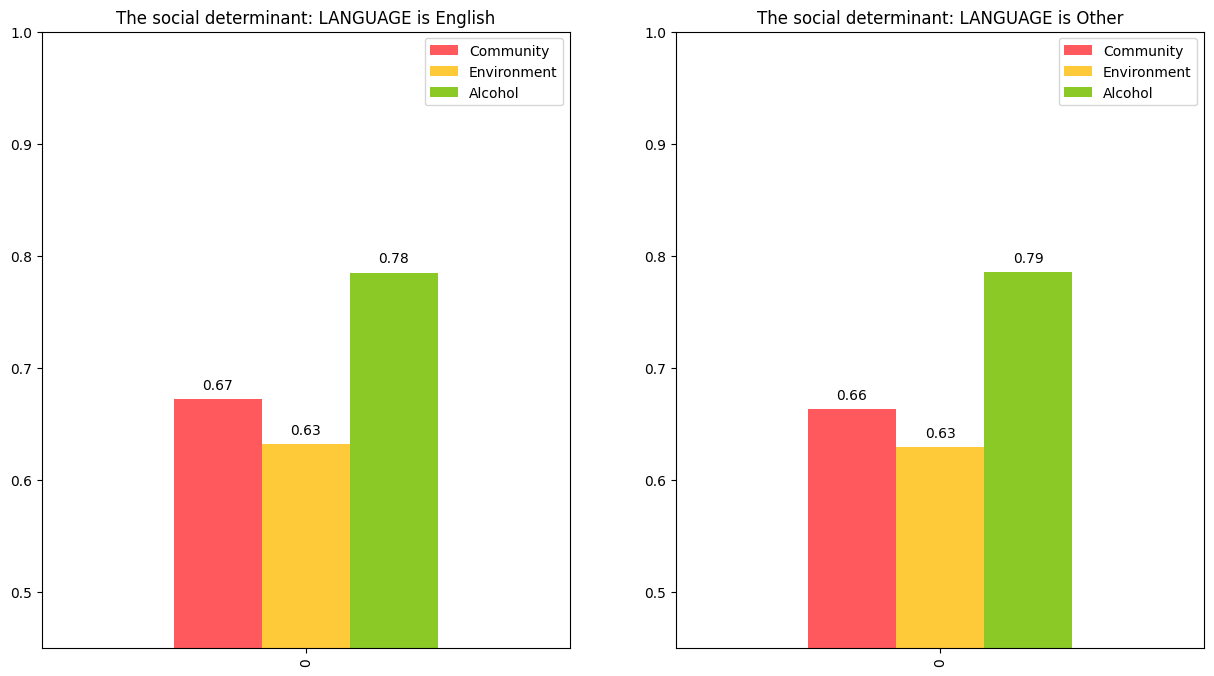

<Figure size 768x576 with 0 Axes>

<Figure size 768x576 with 0 Axes>

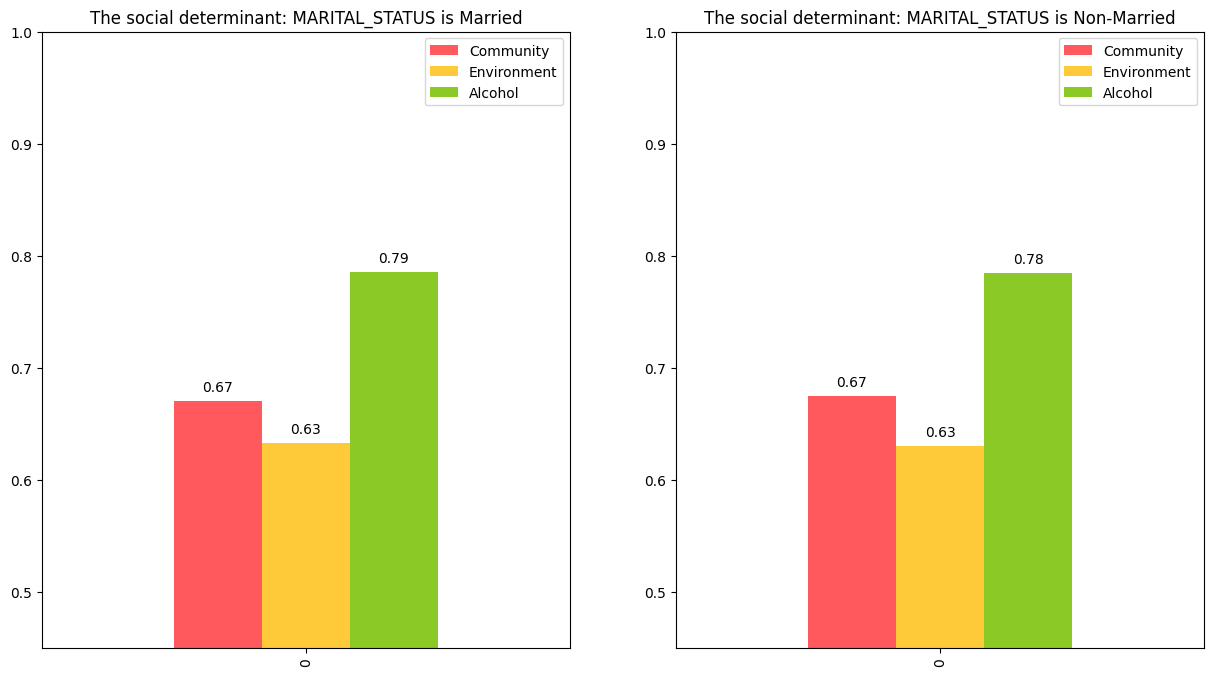

<Figure size 768x576 with 0 Axes>

<Figure size 768x576 with 0 Axes>

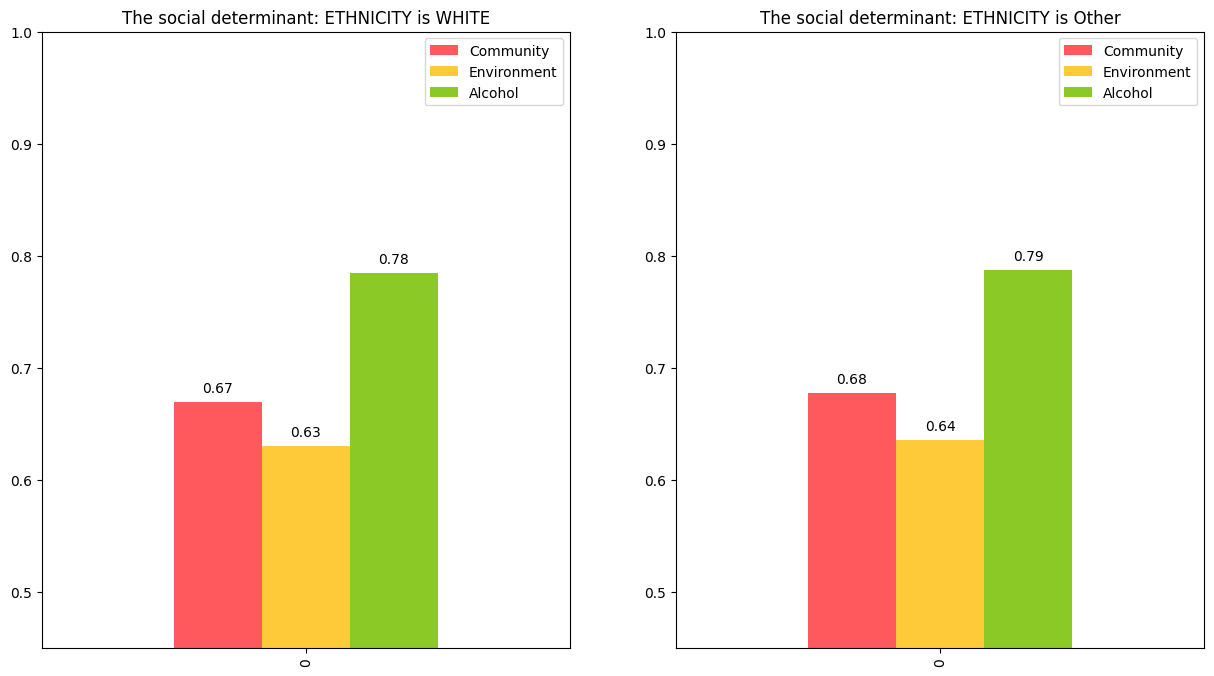

<Figure size 768x576 with 0 Axes>

<Figure size 768x576 with 0 Axes>

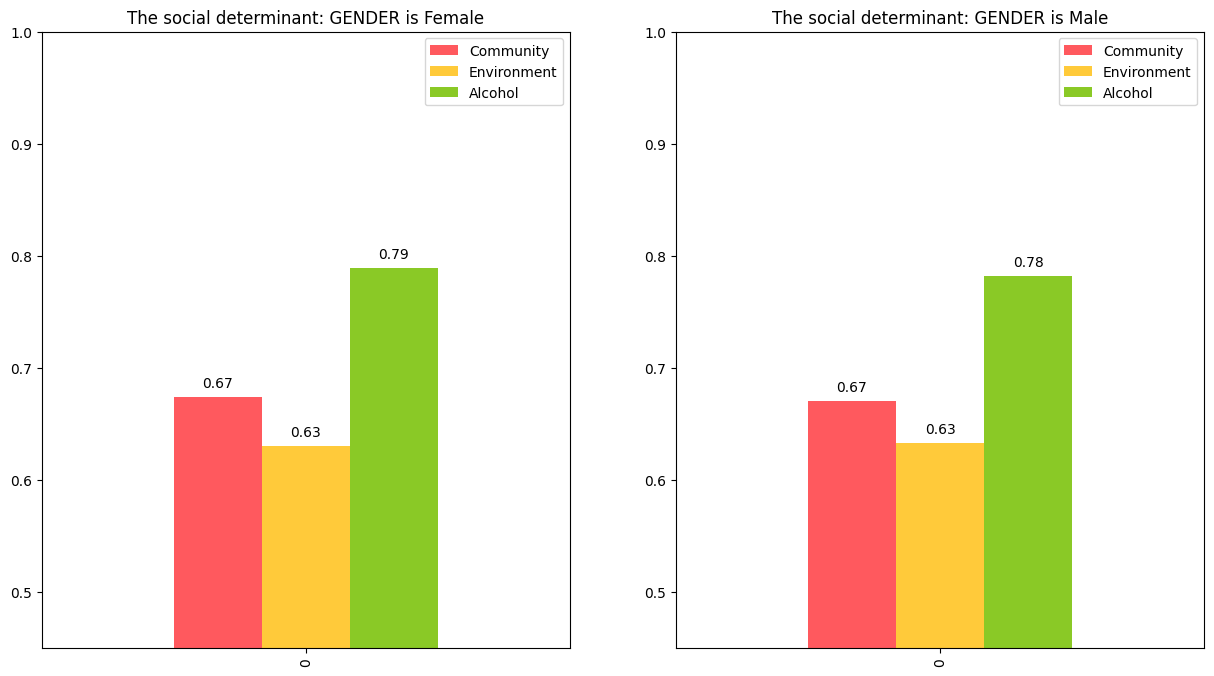

<Figure size 768x576 with 0 Axes>

<Figure size 768x576 with 0 Axes>

In [43]:
def demographic_sdoh_ratio_analysis(df,demographic_features,sdoh_features):
    # palette = ["#6D597A","#B56576","#E34234"]
    palette = ["#FF595E","#FFCA3A","#8AC926"]
    for demographic_feature in demographic_features:
        fig, ax = plt.subplots(1,2,figsize=(15,8))

        if demographic_feature == "INSURANCE":
            order = ["Private","Other"]
        elif demographic_feature == "LANGUAGE":
            order = ["ENGL","Other"]
        elif demographic_feature == 'MARITAL_STATUS':
            order = ["Married","Non-Married"]
        elif demographic_feature == "ETHNICITY":
            order = ["WHITE","Other"]
        # elif demographic_feature == "AGE":
        #     order = [">=65","<65"]
        elif demographic_feature == "GENDER":
            order = ["F","M"]

        for index,value in enumerate(order):
            #every countplot with respect to one sdho feature is put aside of last countplot so they don't overlap
            df_count = pd.DataFrame()

            for sdoh_feature in sdoh_features:
                # display( df[df[demographic_feature]==value][sdoh_feature].sum())

                indices = df[demographic_feature]==value
                if sdoh_feature == "community_binary":
                    feature = "Community"
                elif sdoh_feature == "environment_binary":
                    feature = "Environment"
                elif sdoh_feature == "alcohol_binary":
                    feature = "Alcohol"

                df_count[feature] = [df[indices][sdoh_feature].sum()/indices.sum()]
                # df_count[sdoh_feature] = [df[indices][sdoh_feature].sum()]
            #countplot for df_count, the bottom of y starts with 0.45
            df_count.plot(kind='bar',ax=ax[index],color=palette)

            plt.figure(dpi=120)
            ax[index].set_ylim(0.45,1)

            for p in ax[index].patches:
                #annotate countplot with values on top of bars and sdoh_feature on bottom of bars
                ax[index].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

            if value == "ENGL":
                value = "English"
            elif value == "F":
                value = "Female"
            elif value == "M":
                value = "Male"

            ax[index].set_title(f'The social determinant: {demographic_feature} is {value}')
        # fig.savefig(f'figures/{demographic_feature}_sdoh_ratio.jpg')
        plt.show()

demographic_sdoh_ratio_analysis(df_merged_truncated,demographic_features,sdoh_features)